## **Importing Packages**

In [1]:
!pip install -U graphviz scikit-learn neptune-xgboost xgboost hyperopt mlflow deepchecks
!pip install -U "neptune[xgboost]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
import os

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pwd

/content


In [6]:
# Specify the file path of the Excel file containing the dataset
path = '/content/drive/MyDrive/Loan Prediction Folder/Credit_Risk_Dataset (6)/Credit_Risk_Dataset.xlsx'

# Call the function to read the Excel data
sheet_names= ['loan_information', 'Employment','Personal_information', 'Other_information' ]


df = pd.read_excel(path, sheet_names)
# dfs = read_excel_data(path, sheet_names)

# loan_information = dfs[0]
# employment = dfs[1]
# personal_information = dfs[2]
# other_information = dfs[3]


In [7]:
df.keys()

dict_keys(['loan_information', 'Employment', 'Personal_information', 'Other_information'])

In [8]:
df['loan_information'].dtypes

User_id            int64
Loan Category     object
Amount           float64
Interest Rate    float64
Tenure(years)      int64
dtype: object

In [9]:
df


{'loan_information':          User_id  Loan Category    Amount  Interest Rate  Tenure(years)
 0        7013527  Consolidation   55884.0          11.84              6
 1        7014291  Consolidation   55511.0          16.94              4
 2        7014327  Consolidation   12289.0          11.84              6
 3        7014304    Credit Card   29324.0          14.71              4
 4        7031995    Credit Card   30252.0          14.71              4
 ...          ...            ...       ...            ...            ...
 134412  55993166    Credit Card  287564.0          12.06              6
 134413  56263229         Other    49612.0          14.10              4
 134414  55992716  Consolidation   13632.0          18.96              6
 134415  56363313           Home  186923.0           8.28              4
 134416  56122051  Consolidation  181161.0          15.87              6
 
 [134417 rows x 5 columns],
 'Employment':          User id    Employmet type Tier of Employment  \
 0

In [10]:
df["loan_information"]

,User_id,Loan Category,Amount,Interest Rate,Tenure(years)
0,7013527,Consolidation,55884.0,11.84,6
1,7014291,Consolidation,55511.0,16.94,4
2,7014327,Consolidation,12289.0,11.84,6
3,7014304,Credit Card,29324.0,14.71,4
4,7031995,Credit Card,30252.0,14.71,4
...,...,...,...,...,...
134412,55993166,Credit Card,287564.0,12.06,6
134413,56263229,Other,49612.0,14.10,4
134414,55992716,Consolidation,13632.0,18.96,6
134415,56363313,Home,186923.0,8.28,4


In [11]:
df["Employment"]
#df[2] = df.employment
#df[3] = df.personal_information
#df[4] = df.other_information

,User id,Employmet type,Tier of Employment,Industry,Role,Work Experience,Total Income(PA)
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.0
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.0
2,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,5-10,100000.0
3,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.0
4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.0
...,...,...,...,...,...,...,...
134412,55993166,NaN,NaN,0,KHMbckjadbckIFGTNSEWdkcndwkcnCCM,0,100000.0
134413,56263229,NaN,NaN,0,KHMbckjadbckIFGOHSEWdkcndwkcnCCM,0,27000.0
134414,55992716,NaN,NaN,0,KHMbckjadbckIFGCASEWdkcndwkcnCCM,0,53000.0
134415,56363313,NaN,NaN,0,KHMbckjadbckIFGVASEWdkcndwkcnCCM,0,75400.0


In [12]:
pd.merge?

In [13]:
df['Other_information']

,User_id,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
0,7013527,0,1824.150000,971.46,852.69,0,1
1,7014291,0,22912.532998,18000.00,4912.53,0,0
2,7014327,0,7800.440000,4489.76,3310.68,0,1
3,7014304,0,6672.050000,5212.29,1459.76,0,0
4,7031995,0,11793.001345,10000.00,1793.00,0,0
...,...,...,...,...,...,...,...
134412,55993166,1,12842.400000,7193.83,5648.57,0,0
134413,56263229,0,839.200000,581.67,257.53,0,0
134414,55992716,0,6085.800000,2434.49,3651.31,0,0
134415,56363313,0,4080.640000,3286.82,793.82,0,0


In [14]:
# Merge 'loan_information' and 'Employment' dataframes based on 'User_id'
merged_df = pd.merge(df["loan_information"], df["Employment"], left_on='User_id', right_on='User id')

# Merge the previously merged dataframe with 'personal_information' based on 'User_id'
merged_df = pd.merge(merged_df, df["Personal_information"], left_on='User_id', right_on='User id')

# Merge the previously merged dataframe with 'other_information' based on 'User_id'
merged_df = pd.merge(merged_df, df['Other_information'], left_on='User_id', right_on='User_id')

df=merged_df
# Display the first few rows of the merged dataframe
df.head()

,User_id,Loan Category,Amount,Interest Rate,Tenure(years),User id_x,Employmet type,Tier of Employment,Industry,Role,...,Home,Pincode,Social Profile,Is_verified,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
0,7013527,Consolidation,55884.0,11.84,6,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,...,rent,XX852X,No,NaN,0,1824.150000,971.46,852.69,0,1
1,7014291,Consolidation,55511.0,16.94,4,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,...,mortgage,XX286X,NaN,Source Verified,0,22912.532998,18000.00,4912.53,0,0
2,7014327,Consolidation,12289.0,11.84,6,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,...,own,XX113X,No,NaN,0,7800.440000,4489.76,3310.68,0,1
3,7014304,Credit Card,29324.0,14.71,4,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,...,rent,XX941X,Yes,NaN,0,6672.050000,5212.29,1459.76,0,0
4,7031995,Credit Card,30252.0,14.71,4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,...,rent,XX913X,No,Verified,0,11793.001345,10000.00,1793.00,0,0


# **Exploratory Data Analysis & Data Preparation**

### **Basic Statistics**

In [15]:
# Display data types for each column in the DataFrame. Goal is to see if there is any column with the wrong data type.
df.dtypes

User_id                 int64
Loan Category          object
Amount                float64
Interest Rate         float64
Tenure(years)           int64
User id_x               int64
Employmet type         object
Tier of Employment     object
Industry               object
Role                   object
Work Experience        object
Total Income(PA)      float64
User id_y               int64
Gender                 object
Married                object
Dependents              int64
Home                   object
Pincode                object
Social Profile         object
Is_verified            object
Delinq_2yrs             int64
Total Payement        float64
Received Principal    float64
Interest Received     float64
Number of loans         int64
Defaulter               int64
dtype: object

In [16]:
# Here we'll use describe pandas function to get basic statistics of all numerical columns in our data.
df.describe()

,User_id,Amount,Interest Rate,Tenure(years),User id_x,Total Income(PA),User id_y,Dependents,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
count,1.437270e+05,1.118030e+05,143727.000000,143727.000000,1.437270e+05,1.437270e+05,1.437270e+05,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000
mean,3.733474e+07,1.376458e+05,12.038703,4.514503,3.733474e+07,7.242256e+04,3.733474e+07,1.997113,0.276601,10840.882025,8407.001538,2352.729746,0.005573,0.093712
std,3.182811e+07,1.575427e+05,3.880204,0.874241,3.182811e+07,5.539328e+04,3.182811e+07,1.411317,0.789019,8613.421536,7224.396032,2447.759754,0.098785,0.291429
min,2.080360e+05,0.000000e+00,5.420000,4.000000,2.080360e+05,4.000000e+03,2.080360e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.276118e+06,2.837950e+04,9.180000,4.000000,3.276118e+06,4.500000e+04,3.276118e+06,1.000000,0.000000,4674.775000,3104.160000,841.685000,0.000000,0.000000
50%,5.766517e+07,7.660300e+04,11.840000,4.000000,5.766517e+07,6.180000e+04,5.766517e+07,2.000000,0.000000,8212.410000,6000.000000,1632.240000,0.000000,0.000000
75%,6.729174e+07,2.054645e+05,14.440000,6.000000,6.729174e+07,8.600000e+04,6.729174e+07,3.000000,0.000000,14175.769677,11664.365000,2904.770000,0.000000,0.000000
max,7.895894e+07,8.000078e+06,23.540000,6.000000,7.895894e+07,7.141778e+06,7.895894e+07,4.000000,22.000000,57777.579870,35000.010000,24205.620000,5.000000,1.000000


In [17]:
df.isnull().sum()

User_id                   0
Loan Category             0
Amount                31924
Interest Rate             0
Tenure(years)             0
User id_x                 0
Employmet type        84642
Tier of Employment    84642
Industry                  4
Role                      0
Work Experience           4
Total Income(PA)          0
User id_y                 0
Gender                    0
Married               48143
Dependents                0
Home                      0
Pincode                   0
Social Profile        47856
Is_verified           35803
Delinq_2yrs               0
Total Payement            0
Received Principal        0
Interest Received         0
Number of loans           0
Defaulter                 0
dtype: int64

**Analysis: Handling Missing Values**

Social profile: A new category will be created for NA values.
Is verified: A new category will be created for NA values.
Married: A new category will be created for NA values.
Industry: Drop missing values.
Work experience: Drop missing values.
Amount: Evaluate the impact of removing rows with missing values on the data distribution.
Employment type: Determine the appropriate approach for handling missing values.
Tier of employment: Determine the appropriate approach for handling missing values.

In [18]:
# Drop rows with missing values in the 'Industry' and 'Work Experience' columns as the data in 'Industry' is meaningless due to encryption,
# and 'Work Experience' is inconsistent in the dataset, treating it as an object datatype variable which may impact model performance.
df = df.dropna(subset=['Industry', 'Work Experience'])
df.isnull().sum()

User_id                   0
Loan Category             0
Amount                31923
Interest Rate             0
Tenure(years)             0
User id_x                 0
Employmet type        84639
Tier of Employment    84639
Industry                  0
Role                      0
Work Experience           0
Total Income(PA)          0
User id_y                 0
Gender                    0
Married               48142
Dependents                0
Home                      0
Pincode                   0
Social Profile        47855
Is_verified           35801
Delinq_2yrs               0
Total Payement            0
Received Principal        0
Interest Received         0
Number of loans           0
Defaulter                 0
dtype: int64

In [19]:
# Call the function to replace null values with "missing"
replace_with='missing'
columns_to_replace = ['Social Profile', 'Is_verified', 'Married', 'Employmet type']

def replace_null_values_with_a_value(df, columns_to_replace, replace_with):
  for column in columns_to_replace:
    df[column] = df[column].fillna(replace_with)

  return df
df= replace_null_values_with_a_value(df, columns_to_replace, replace_with)

<ipython-input-19-60c28d8f212a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(replace_with)


In [20]:
#Create a new variable "amount_missing" to indicate if the 'Amount' is missing or not. Assign 1 if 'Amount' is null, otherwise assign 0.
df['amount_missing'] = np.where(df['Amount'].isnull(), 1, 0)

#Replace the null values in the 'Amount' column with the value "-1000" to differentiate them from the rest of the data.
replace_with= - 1000
columns_to_replace = ['Amount']

df= replace_null_values_with_a_value(df, columns_to_replace,replace_with)

<ipython-input-20-9befbefbb646>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount_missing'] = np.where(df['Amount'].isnull(), 1, 0)
<ipython-input-19-60c28d8f212a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(replace_with)


In [21]:
# Replace the null values in the 'Tier of Employment' column with the string "Z" to categorize them separately.
replace_with='Z'
columns_to_replace = ['Tier of Employment']

df= replace_null_values_with_a_value(df, columns_to_replace,replace_with)

<ipython-input-19-60c28d8f212a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(replace_with)


In [22]:
#Check for null rows in the DataFrame to confirm if the data is clean and does not contain any missing values
# that could potentially impact the performance of the model.
df.isnull().sum()

User_id               0
Loan Category         0
Amount                0
Interest Rate         0
Tenure(years)         0
User id_x             0
Employmet type        0
Tier of Employment    0
Industry              0
Role                  0
Work Experience       0
Total Income(PA)      0
User id_y             0
Gender                0
Married               0
Dependents            0
Home                  0
Pincode               0
Social Profile        0
Is_verified           0
Delinq_2yrs           0
Total Payement        0
Received Principal    0
Interest Received     0
Number of loans       0
Defaulter             0
amount_missing        0
dtype: int64

# **Drop categorical columns with too many categories**

In [23]:
def unique_values_each_column(df):
  for column in df:
    print(f"Unique values in {column} : {df[column].nunique()}")



# Call the function to print the number of unique values in all columns
unique_values_each_column(df)

Unique values in User_id : 133748
Unique values in Loan Category : 7
Unique values in Amount : 86157
Unique values in Interest Rate : 137
Unique values in Tenure(years) : 2
Unique values in User id_x : 133748
Unique values in Employmet type : 3
Unique values in Tier of Employment : 8
Unique values in Industry : 12974
Unique values in Role : 46
Unique values in Work Experience : 7
Unique values in Total Income(PA) : 11380
Unique values in User id_y : 133748
Unique values in Gender : 3
Unique values in Married : 3
Unique values in Dependents : 5
Unique values in Home : 5
Unique values in Pincode : 844
Unique values in Social Profile : 3
Unique values in Is_verified : 4
Unique values in Delinq_2yrs : 22
Unique values in Total Payement  : 104199
Unique values in Received Principal : 42021
Unique values in Interest Received : 93859
Unique values in Number of loans : 5
Unique values in Defaulter : 2
Unique values in amount_missing : 2


Observations

Some columns are ordinal and those categorical variables would need to be treated differently during categorical encoding.
Address the challenge of categorical columns with a large number of categories. Determine which categories fall into this category and develop a strategy for handling them.

In [24]:
# @title
# Dropping Industry Column and User_IDs as it doesn't give any significant information
# Drop 'Pincode' column: Considering privacy concerns, the 'Pincode' data is encrypted. To address these concerns, it is prudent to remove the 'Pincode' column from the dataset.

def drop_columns(df, columns):
  return df.drop(columns, axis=1)

columns_to_drop = ['Industry', 'User_id','User id_x','User id_y','Pincode','Role']

# Call the function to drop columns

drop_columns(df, columns_to_drop)

,Loan Category,Amount,Interest Rate,Tenure(years),Employmet type,Tier of Employment,Work Experience,Total Income(PA),Gender,Married,...,Home,Social Profile,Is_verified,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter,amount_missing
0,Consolidation,55884.0,11.84,6,Salaried,B,1-2,125000.0,Female,Yes,...,rent,No,missing,0,1824.150000,971.46,852.69,0,1,0
1,Consolidation,55511.0,16.94,4,Self - Employeed,D,10+,61000.0,Female,No,...,mortgage,missing,Source Verified,0,22912.532998,18000.00,4912.53,0,0,0
2,Consolidation,12289.0,11.84,6,missing,Z,5-10,100000.0,Other,missing,...,own,No,missing,0,7800.440000,4489.76,3310.68,0,1,0
3,Credit Card,29324.0,14.71,4,missing,Z,2-3,30000.0,Male,missing,...,rent,Yes,missing,0,6672.050000,5212.29,1459.76,0,0,0
4,Credit Card,30252.0,14.71,4,missing,Z,10+,65000.0,Male,missing,...,rent,No,Verified,0,11793.001345,10000.00,1793.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143722,Credit Card,287564.0,12.06,6,missing,Z,0,100000.0,Female,No,...,mortgage,missing,Source Verified,1,12842.400000,7193.83,5648.57,0,0,0
143723,Other,49612.0,14.10,4,missing,Z,0,27000.0,Male,Yes,...,rent,No,Source Verified,0,839.200000,581.67,257.53,0,0,0
143724,Consolidation,13632.0,18.96,6,missing,Z,0,53000.0,Female,Yes,...,rent,missing,missing,0,6085.800000,2434.49,3651.31,0,0,0
143725,Home,186923.0,8.28,4,missing,Z,0,75400.0,Other,No,...,mortgage,missing,Source Verified,0,4080.640000,3286.82,793.82,0,0,0


#Multicollinearity
To assess the relationships between variables in the input DataFrame, we compute the Spearman correlation matrix, that tells how much two variables are correlated.

By examining the heatmap, we can identify potential concerns related to multicollinearity, which occurs when two or more independent variables exhibit high correlation. Multicollinearity can impact the interpretation of the model and lead to overfitting. In such instances, it may be necessary to remove one of the correlated variables to mitigate these issues.

<ipython-input-25-19e19acc403f>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


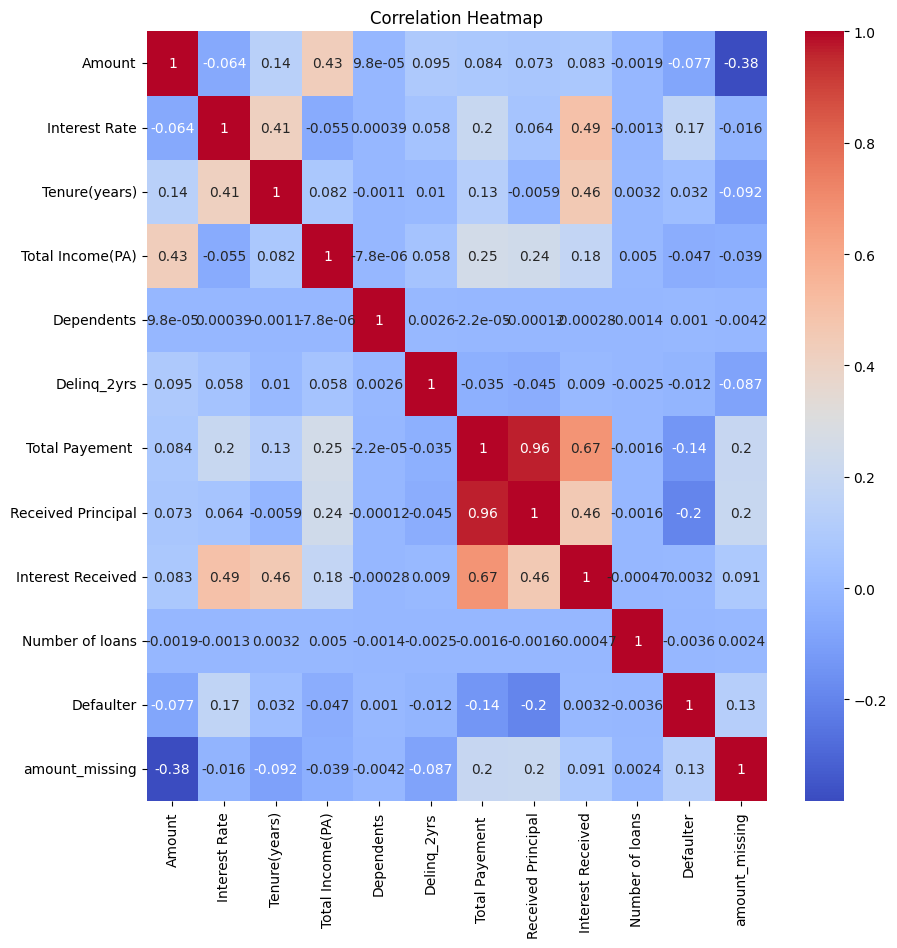

In [25]:
# @title
# Multicollinarity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression mode

#correlation_heatmap(df)
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_heatmap(df):
    plt.figure(figsize=(10, 10))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
df = drop_columns(df, columns_to_drop)
correlation_heatmap(df)


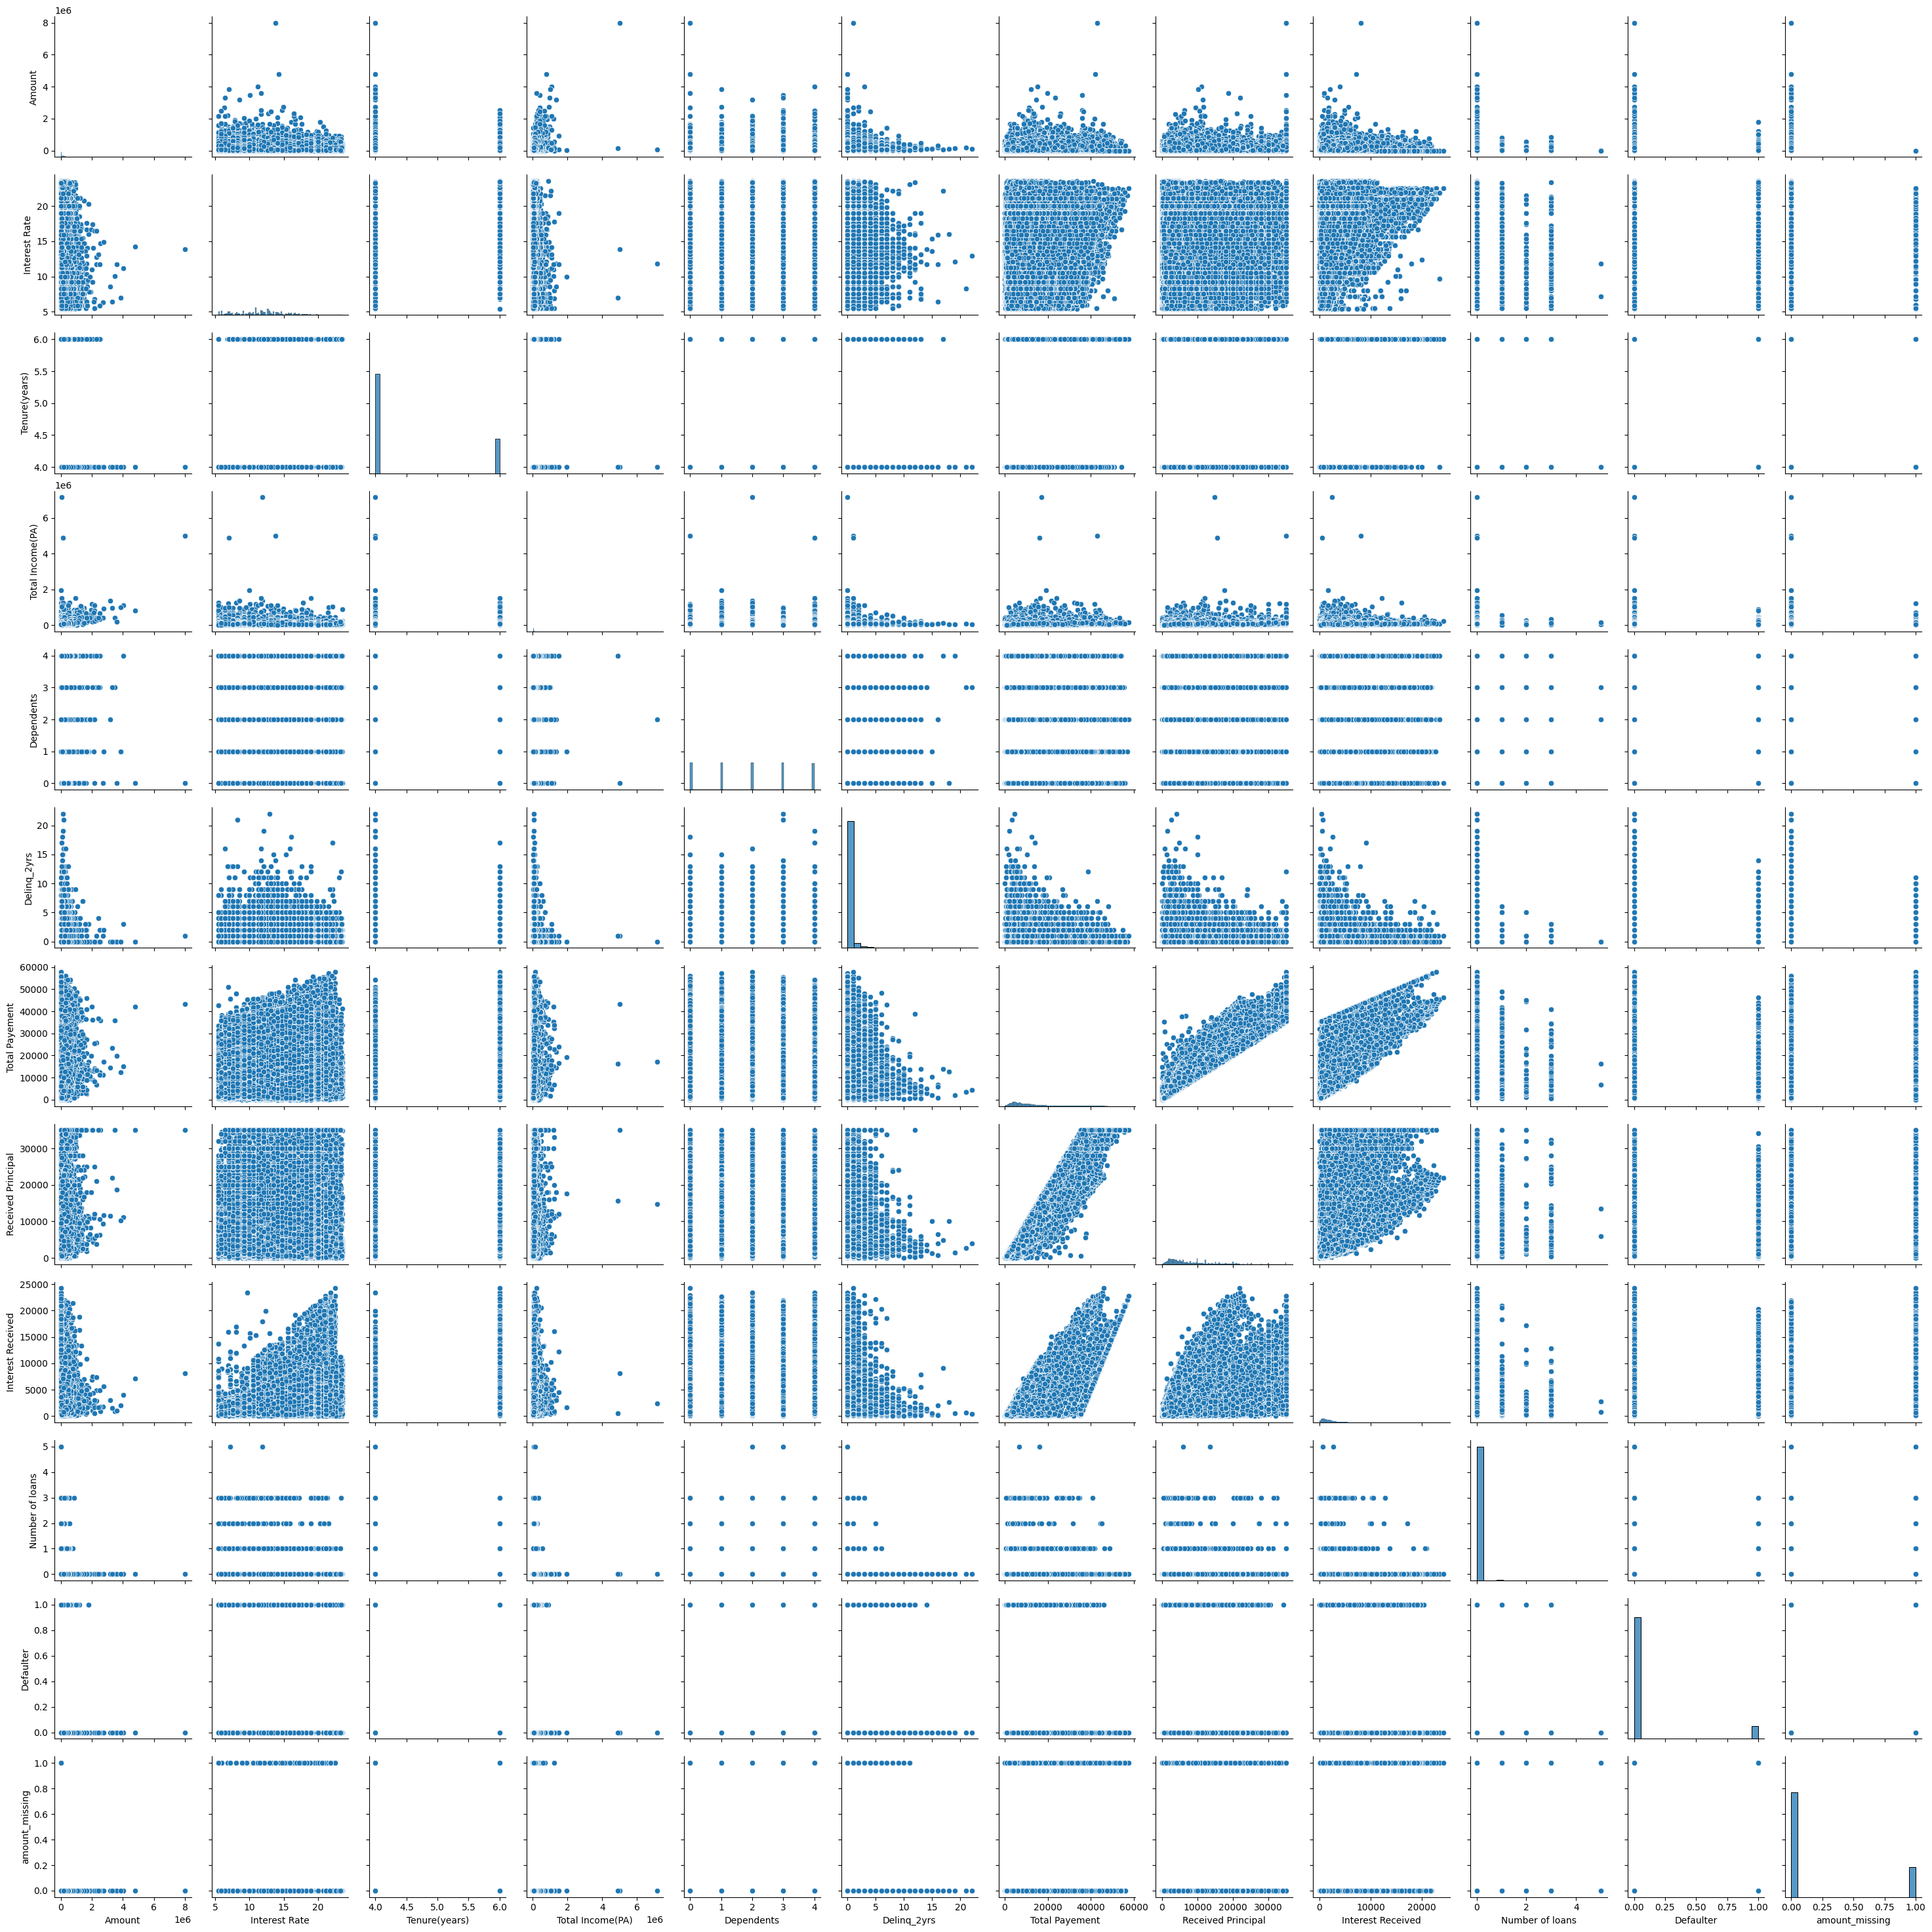

In [26]:
# @title
# Let's plot all interaction scatter plots using seaborn

# Call the function to plot pairwise scatter plots
#plot_pairwise_scatter(df)

import seaborn as sns
import matplotlib.pyplot as plt
def plot_pairwise_scatter(df):
  sns.pairplot(df)
  plt.show()
plot_pairwise_scatter(df)


#Understanding Skewness

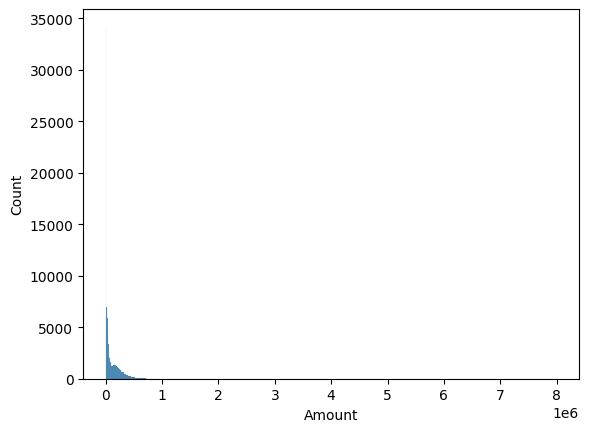

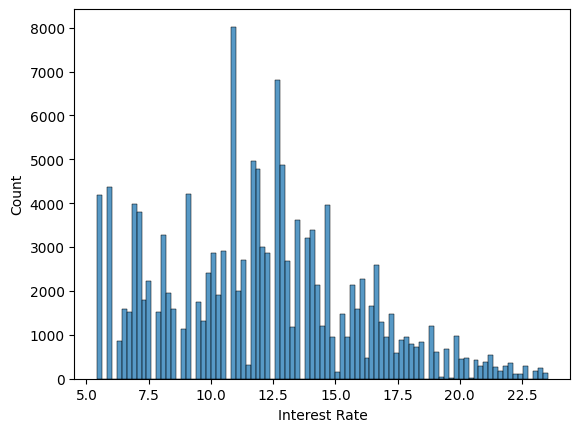

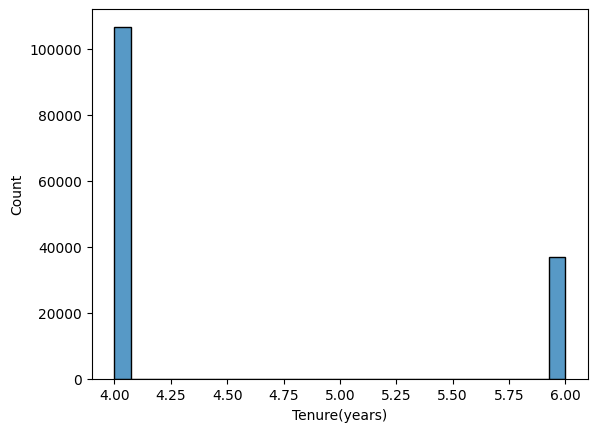

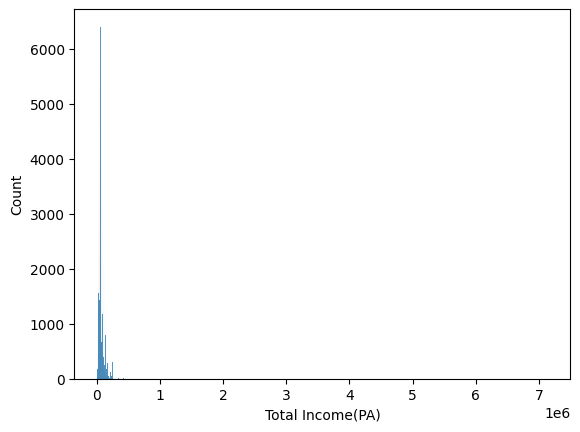

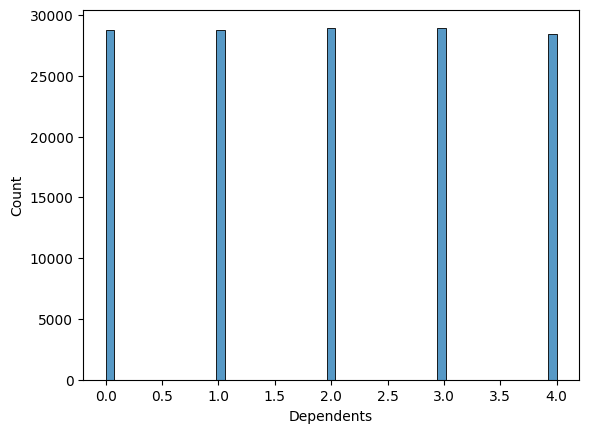

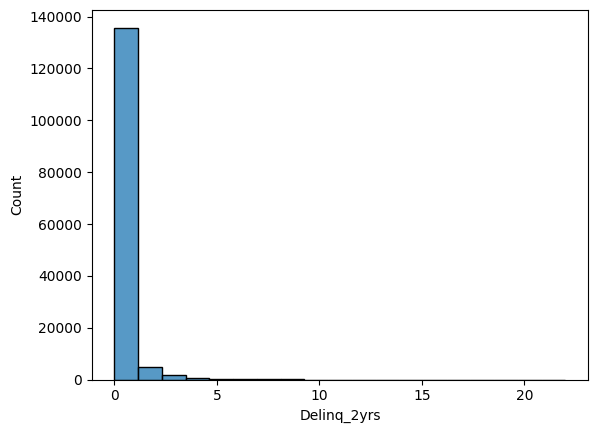

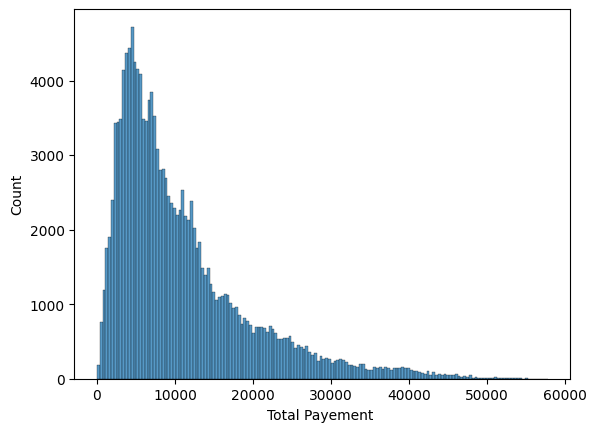

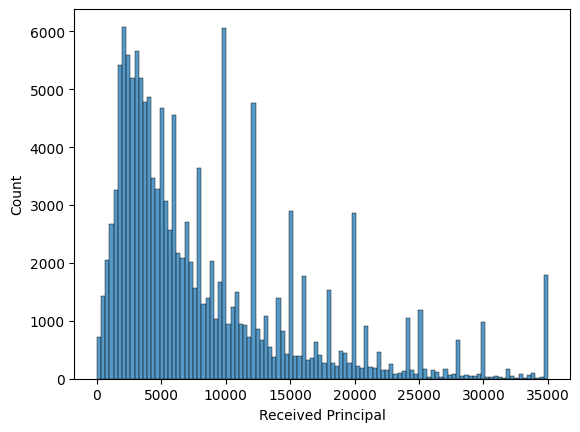

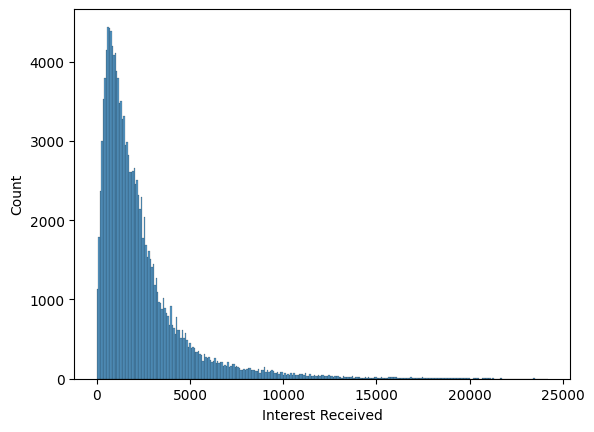

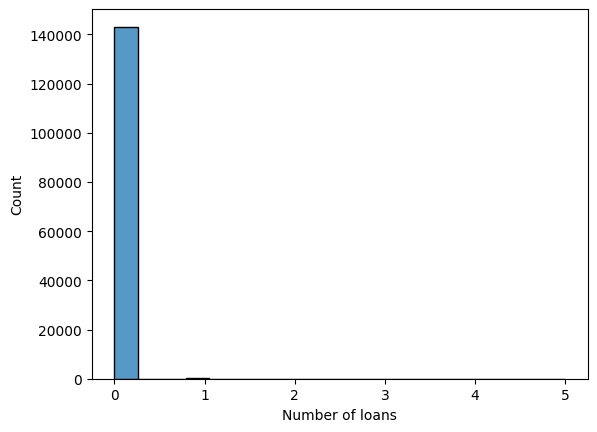

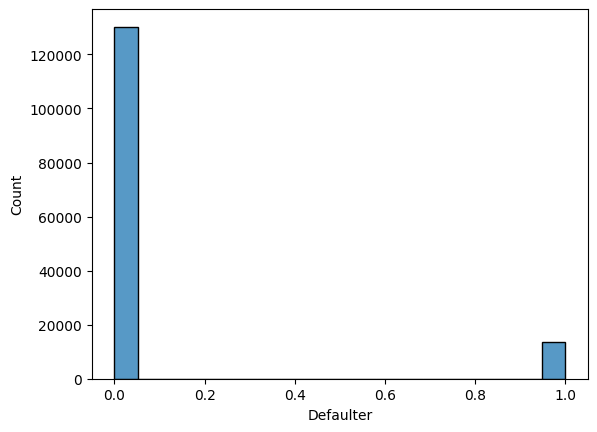

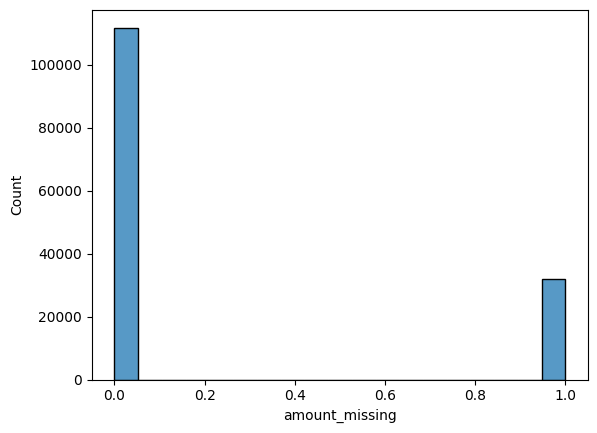

In [27]:
# @title
# To identify anomalies in each column, it is essential to examine the distributions of the variables in the dataset.

# Call the function to plot histograms
import seaborn as sns
import matplotlib.pyplot as plt

def Feature_Distributions_Histogram(df):
  for column in df.select_dtypes(include=['number']):
    sns.histplot(df[column])
    plt.show()
Feature_Distributions_Histogram(df)

In [28]:
# @title
# Add all the features to check and fix skewness in features_log array
# features_log= ['Amount','Interest Rate','Tenure(years)','Dependents','Total Payement ','Received Principal','Interest Received']

# df= fix_skewness(df, features_log)

#Categorical Hot-Encoding

In [29]:
# @title
import pandas as pd

# Add all categorical features for categorical one-hot encoding in categorical_features array
data = df
categorical_features= ["Gender", "Married", "Home", "Social Profile", "Loan Category", "Employmet type","Is_verified", ]

# Perform one-hot encoding using pandas get_dummies() function
encoded_data = pd.get_dummies(data, columns=categorical_features)



#Ordinal Encoding

In [30]:
def perform_ordinal_encoding(df, ordinal_features, custom_mapping=None):
  for column in ordinal_features:
    if custom_mapping is not None:
      df[column] = df[column].map(custom_mapping)
    else:
      df[column] = df[column].astype('category').cat.codes

  return df

# @title
# Define the ordinal categorical features array
ordinal_features = ["Tier of Employment", "Work Experience"]

# Define the pandas DataFrame for encoding
data = encoded_data

# Create a custom mapping of categories to numerical labels
tier_employment_order= list(encoded_data["Tier of Employment"].unique())
tier_employment_order.sort()

work_experience_order= [ 0, '<1', '1-2', '2-3', '3-5', '5-10','10+']

custom_mapping = {
    "Tier of Employment": tier_employment_order,
    "Work Experience": work_experience_order,
}

# Call the function to perform ordinal encoding
data = perform_ordinal_encoding(data, ordinal_features, custom_mapping)

data



,Amount,Interest Rate,Tenure(years),Tier of Employment,Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payement,Received Principal,...,Loan Category_Home,Loan Category_Medical,Loan Category_Other,Employmet type_Salaried,Employmet type_Self - Employeed,Employmet type_missing,Is_verified_Not Verified,Is_verified_Source Verified,Is_verified_Verified,Is_verified_missing
0,55884.0,11.84,6,NaN,NaN,125000.0,4,0,1824.150000,971.46,...,0,0,0,1,0,0,0,0,0,1
1,55511.0,16.94,4,NaN,NaN,61000.0,1,0,22912.532998,18000.00,...,0,0,0,0,1,0,0,1,0,0
2,12289.0,11.84,6,NaN,NaN,100000.0,3,0,7800.440000,4489.76,...,0,0,0,0,0,1,0,0,0,1
3,29324.0,14.71,4,NaN,NaN,30000.0,1,0,6672.050000,5212.29,...,0,0,0,0,0,1,0,0,0,1
4,30252.0,14.71,4,NaN,NaN,65000.0,3,0,11793.001345,10000.00,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143722,287564.0,12.06,6,NaN,NaN,100000.0,2,1,12842.400000,7193.83,...,0,0,0,0,0,1,0,1,0,0
143723,49612.0,14.10,4,NaN,NaN,27000.0,3,0,839.200000,581.67,...,0,0,1,0,0,1,0,1,0,0
143724,13632.0,18.96,6,NaN,NaN,53000.0,2,0,6085.800000,2434.49,...,0,0,0,0,0,1,0,0,0,1
143725,186923.0,8.28,4,NaN,NaN,75400.0,0,0,4080.640000,3286.82,...,1,0,0,0,0,1,0,1,0,0


In [38]:
pd.to_pickle(data, r"drive/MyDrive/Colab Notebooks/breakpoint.pkl")

In [32]:
pd.save(data)

,Amount,Interest Rate,Tenure(years),Tier of Employment,Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payement,Received Principal,...,Loan Category_Home,Loan Category_Medical,Loan Category_Other,Employmet type_Salaried,Employmet type_Self - Employeed,Employmet type_missing,Is_verified_Not Verified,Is_verified_Source Verified,Is_verified_Verified,Is_verified_missing
0,55884.0,11.84,6,NaN,NaN,125000.0,4,0,1824.150000,971.46,...,0,0,0,1,0,0,0,0,0,1
1,55511.0,16.94,4,NaN,NaN,61000.0,1,0,22912.532998,18000.00,...,0,0,0,0,1,0,0,1,0,0
2,12289.0,11.84,6,NaN,NaN,100000.0,3,0,7800.440000,4489.76,...,0,0,0,0,0,1,0,0,0,1
3,29324.0,14.71,4,NaN,NaN,30000.0,1,0,6672.050000,5212.29,...,0,0,0,0,0,1,0,0,0,1
4,30252.0,14.71,4,NaN,NaN,65000.0,3,0,11793.001345,10000.00,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143722,287564.0,12.06,6,NaN,NaN,100000.0,2,1,12842.400000,7193.83,...,0,0,0,0,0,1,0,1,0,0
143723,49612.0,14.10,4,NaN,NaN,27000.0,3,0,839.200000,581.67,...,0,0,1,0,0,1,0,1,0,0
143724,13632.0,18.96,6,NaN,NaN,53000.0,2,0,6085.800000,2434.49,...,0,0,0,0,0,1,0,0,0,1
143725,186923.0,8.28,4,NaN,NaN,75400.0,0,0,4080.640000,3286.82,...,1,0,0,0,0,1,0,1,0,0


#Fix data imbalance in the target variable

In [ ]:
#!pip install -U imbalanced-learn
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# def fix_imbalance_using_oversamping(df, target_column):
#   X = df.drop(target_column, axis=1)
#   y = df[target_column]

#   smote = SMOTE(random_state=42)
#   X, y = smote.fit_resample(X, y)

#   return X, y
target_column="Defaulter"
def fix_imbalance_using_oversamping(data, target_column):
  """
  This function fixes the imbalance in the data using oversampling.

  Args:
    data: The DataFrame containing the data.
    target_column: The name of the target column.

  Returns:
    A tuple of (X, y), where X is the array of features and y is the array of target values.
  """

  # Get the majority class and minority class.
  majority_class = data[target_column].mode()[0]
  minority_class = data[target_column].value_counts().sort_values(ascending=False).index[0]

  # Get the number of samples in the majority class.
  majority_class_count = data[target_column].value_counts()[majority_class]

  # Oversample the minority class.
  oversampled_data = SMOTE(sampling_strategy={minority_class: majority_class_count})
  X, y = oversampled_data.fit_resample(data.drop(target_column, axis=1), data[target_column])

  return X, y



# @title
# Specify the name of the target variable column


X, y= fix_imbalance_using_oversamping(data, target_column)

